In [1]:
import requests
import pandas as pd
import datetime

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

## Daten der SVP laden

In [3]:
#Daten laden mit Path, damit die Namen nachher sauber geschrieben sind und ich danach filtern kann
df_raw = pd.read_csv(Path('./SVP_Vorstoesse_14_23_mit_Resultat_bereinigt.csv'), encoding='UTF-8')

In [4]:
df_raw['Datum'] = pd.to_datetime(df_raw['Datum'])

In [5]:
df_svp = df_raw.copy()

# Komischen Leerschlag ersetzen: regex muss auf "True" sein, sonst wird es nur ersetzt, wenn der ganze Inhalt der Zelle dem Suchwert entspricht
df_svp = df_svp.replace(u"\xa0", " ", regex=True)

## Erfolgsquote pro Jahr berechnen

In [6]:
#Zuerst kreiere ich ein DataFrame für nur die Postulate und Motionen und rechne jene raus, die noch nicht entschieden sind
df_mp_svp = df_svp[(df_svp["Geschäftsart"].isin(["Motion", "Postulat"])) & (~df_svp["_entscheidbereinigt"].isna())]

# Sicher gehen, dass Datum im richtigen Format ist
df_mp_svp['Datum'] = pd.to_datetime(df_mp_svp['Datum'])

# Hier filtre ich die Überwiesenen raus und schliesse nochmals jene aus ohne entscheidung (könnte man wohl aber weglassen)
df_mp_svp_filtered = df_mp_svp[(df_mp_svp["_entscheidbereinigt"] == "Überweisung") & (~df_mp_svp["_entscheidbereinigt"].isna())]

# Hier wird nach Monat gruppiert und die Überwiesenen durch die Gesamtzahl der Motionen und Postulate geteilt. 
# Das ergiebt dann die Erfolgsquote
erfolgsquote_svp_jahr = df_mp_svp_filtered.resample('Y', on='Datum').size() / df_mp_svp.resample('Y', on='Datum').size()

C:\Users\hudecj\AppData\Local\Temp\ipykernel_90332\3666115319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mp_svp['Datum'] = pd.to_datetime(df_mp_svp['Datum'])


In [7]:
erfolgsquote_svp_jahr

Datum
2014-12-31    0.600000
2015-12-31    0.187500
2016-12-31    0.363636
2017-12-31    0.258065
2018-12-31    0.583333
2019-12-31    0.437500
2020-12-31    0.435897
2021-12-31    0.379310
2022-12-31    0.400000
2023-12-31    0.275862
Freq: A-DEC, dtype: float64

In [8]:
df_erfolgsquote_svp_jahr = pd.DataFrame(erfolgsquote_svp_jahr)

In [9]:
df_erfolgsquote_svp_jahr

,0
Datum,
2014-12-31,0.600000
2015-12-31,0.187500
2016-12-31,0.363636
2017-12-31,0.258065
2018-12-31,0.583333
2019-12-31,0.437500
2020-12-31,0.435897
2021-12-31,0.379310
2022-12-31,0.400000


In [10]:
df_erfolgsquote_svp_jahr.rename(columns={0: 'Erfolgsquote_SVP'}, inplace=True)

In [11]:
df_erfolgsquote_svp_jahr

,Erfolgsquote_SVP
Datum,
2014-12-31,0.600000
2015-12-31,0.187500
2016-12-31,0.363636
2017-12-31,0.258065
2018-12-31,0.583333
2019-12-31,0.437500
2020-12-31,0.435897
2021-12-31,0.379310
2022-12-31,0.400000


In [12]:
df_erfolgsquote_svp_jahr.reset_index(inplace=True)

<Axes: xlabel='Datum'>

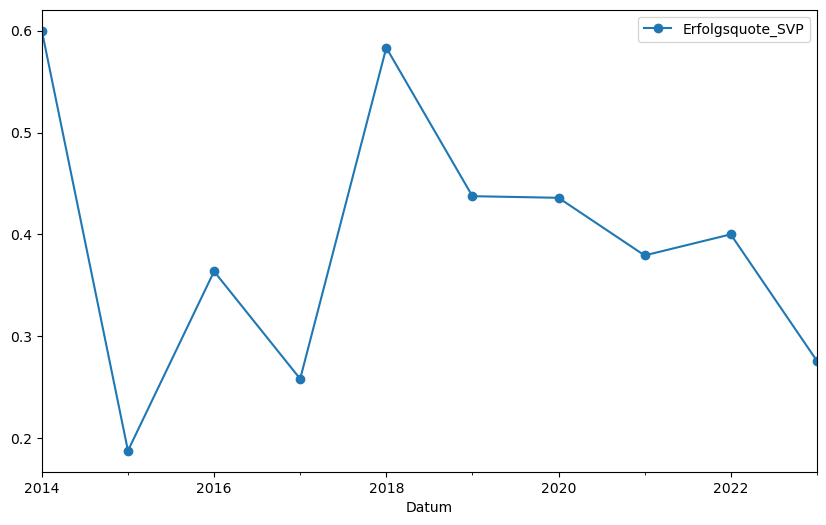

In [13]:
df_erfolgsquote_svp_jahr.plot(x= "Datum", y='Erfolgsquote_SVP', marker='o', figsize=(10, 6))

## Daten der SP laden

In [14]:
df_raw = pd.read_csv(Path('./SP_Vorstoesse_14_23_mit_Resultat_bereinigt.csv'), encoding='UTF-8')

In [15]:
df_raw['Datum'] = pd.to_datetime(df_raw['Datum'])

In [16]:
df_sp = df_raw.copy()

# Komischen Leerschlag ersetzen: regex muss auf "True" sein, sonst wird es nur ersetzt, wenn der ganze Inhalt der Zelle dem Suchwert entspricht
df_sp = df_sp.replace(u"\xa0", " ", regex=True)

## Erfolgsquote berechnen

In [17]:
#Zuerst kreiere ich ein DataFrame für nur die Postulate und Motionen und rechne jene raus, die noch nicht entschieden sind
df_mp_sp = df_sp[(df_sp["Geschäftsart"].isin(["Motion", "Postulat"])) & (~df_sp["_entscheidbereinigt"].isna())]

# Sicher gehen, dass Datum im richtigen Format ist
df_mp_sp['Datum'] = pd.to_datetime(df_mp_sp['Datum'])

# Hier filtre ich die Überwiesenen raus und schliesse nochmals jene aus ohne entscheidung (könnte man wohl aber weglassen)
df_mp_sp_filtered = df_mp_sp[(df_mp_sp["_entscheidbereinigt"] == "Überweisung") & (~df_mp_sp["_entscheidbereinigt"].isna())]

# Hier wird nach Monat gruppiert und die Überwiesenen durch die Gesamtzahl der Motionen und Postulate geteilt. 
# Das ergiebt dann die Erfolgsquote
erfolgsquote_sp_jahr = df_mp_sp_filtered.resample('Y', on='Datum').size() / df_mp_sp.resample('Y', on='Datum').size()

C:\Users\hudecj\AppData\Local\Temp\ipykernel_90332\939682942.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mp_sp['Datum'] = pd.to_datetime(df_mp_sp['Datum'])


In [18]:
df_erfolgsquote_sp_jahr = pd.DataFrame(erfolgsquote_sp_jahr)

In [19]:
df_erfolgsquote_sp_jahr

,0
Datum,
2014-12-31,0.840000
2015-12-31,0.800000
2016-12-31,0.868421
2017-12-31,0.966667
2018-12-31,0.978723
2019-12-31,0.927273
2020-12-31,0.935484
2021-12-31,0.914286
2022-12-31,0.978022


In [20]:
df_erfolgsquote_sp_jahr.rename(columns={0: 'Erfolgsquote_SP'}, inplace=True)

In [21]:
df_erfolgsquote_sp_jahr.reset_index(inplace=True)

In [22]:
df_erfolgsquote_sp_jahr.dtypes

Datum              datetime64[ns]
Erfolgsquote_SP           float64
dtype: object

<Axes: xlabel='Datum'>

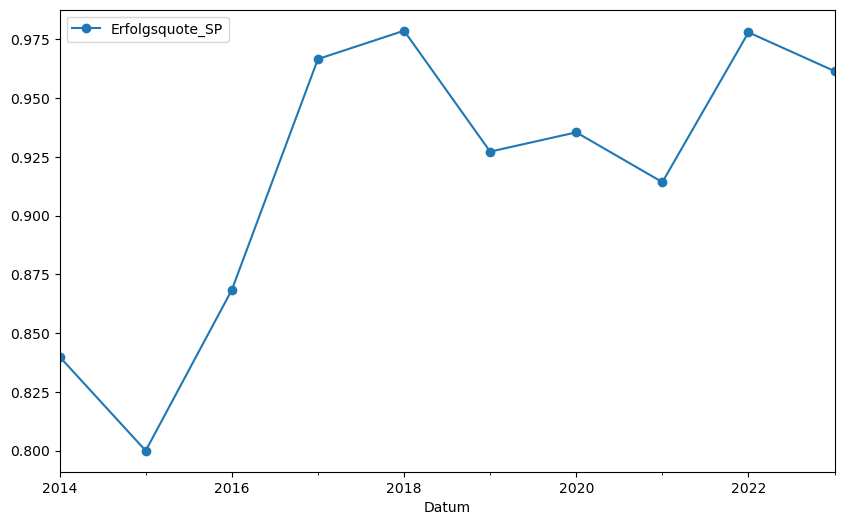

In [23]:
df_erfolgsquote_sp_jahr.plot(x= "Datum", y='Erfolgsquote_SP', marker='o', figsize=(10, 6))

## Daten FDP laden

In [24]:
df_raw = pd.read_csv(Path('./FDP_Vorstoesse_14_23_mit_Resultat_bereinigt.csv'), encoding='UTF-8')

In [25]:
df_raw['Datum'] = pd.to_datetime(df_raw['Datum'])

In [26]:
df_fdp = df_raw.copy()

# Komischen Leerschlag ersetzen: regex muss auf "True" sein, sonst wird es nur ersetzt, wenn der ganze Inhalt der Zelle dem Suchwert entspricht
df_fdp = df_fdp.replace(u"\xa0", " ", regex=True)

## Erfolgsquote berechnen

In [27]:
#Zuerst kreiere ich ein DataFrame für nur die Postulate und Motionen und rechne jene raus, die noch nicht entschieden sind
df_mp_fdp = df_fdp[(df_fdp["Geschäftsart"].isin(["Motion", "Postulat"])) & (~df_fdp["_entscheidbereinigt"].isna())]

# Sicher gehen, dass Datum im richtigen Format ist
df_mp_fdp['Datum'] = pd.to_datetime(df_mp_fdp['Datum'])

# Hier filtre ich die Überwiesenen raus und schliesse nochmals jene aus ohne entscheidung (könnte man wohl aber weglassen)
df_mp_fdp_filtered = df_mp_fdp[(df_mp_fdp["_entscheidbereinigt"] == "Überweisung") & (~df_mp_fdp["_entscheidbereinigt"].isna())]

# Hier wird nach Monat gruppiert und die Überwiesenen durch die Gesamtzahl der Motionen und Postulate geteilt. 
# Das ergiebt dann die Erfolgsquote
erfolgsquote_fdp_jahr = df_mp_fdp_filtered.resample('Y', on='Datum').size() / df_mp_fdp.resample('Y', on='Datum').size()

C:\Users\hudecj\AppData\Local\Temp\ipykernel_90332\2031729387.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mp_fdp['Datum'] = pd.to_datetime(df_mp_fdp['Datum'])


In [28]:
df_erfolgsquote_fdp_jahr = pd.DataFrame(erfolgsquote_fdp_jahr)

In [29]:
df_erfolgsquote_fdp_jahr

,0
Datum,
2014-12-31,0.625000
2015-12-31,0.777778
2016-12-31,0.647059
2017-12-31,0.611111
2018-12-31,0.774194
2019-12-31,0.750000
2020-12-31,0.729730
2021-12-31,0.735294
2022-12-31,0.760870


In [30]:
df_erfolgsquote_fdp_jahr.rename(columns={0: 'Erfolgsquote_FDP'}, inplace=True)

In [31]:
df_erfolgsquote_fdp_jahr.reset_index(inplace=True)

In [32]:
df_erfolgsquote_fdp_jahr.dtypes

Datum               datetime64[ns]
Erfolgsquote_FDP           float64
dtype: object

<Axes: xlabel='Datum'>

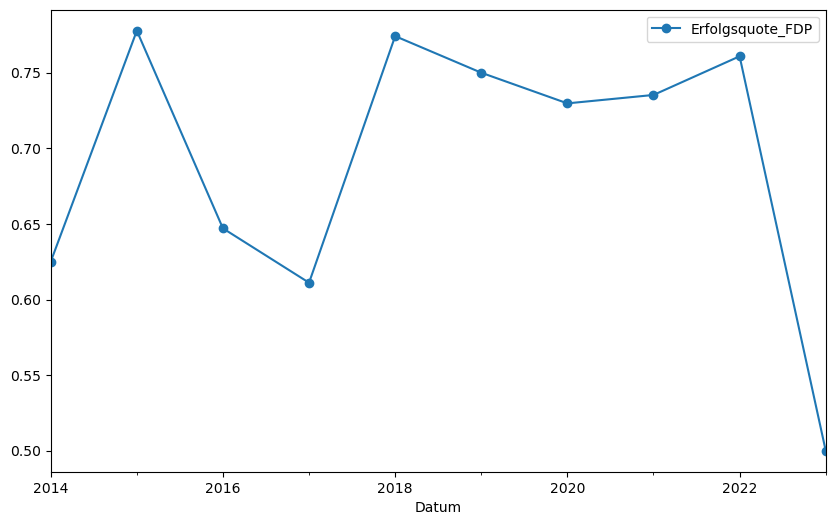

In [33]:
df_erfolgsquote_fdp_jahr.plot(x= "Datum", y='Erfolgsquote_FDP', marker='o', figsize=(10, 6))

## Daten GLP laden

In [34]:
df_raw = pd.read_csv(Path('./GLP_Vorstoesse_14_23_mit_Resultat_bereinigt.csv'), encoding='UTF-8')

In [35]:
df_raw['Datum'] = pd.to_datetime(df_raw['Datum'])

In [36]:
df_glp = df_raw.copy()

# Komischen Leerschlag ersetzen: regex muss auf "True" sein, sonst wird es nur ersetzt, wenn der ganze Inhalt der Zelle dem Suchwert entspricht
df_glp = df_glp.replace(u"\xa0", " ", regex=True)

## Erfolgsquote berechnen

In [37]:
#Zuerst kreiere ich ein DataFrame für nur die Postulate und Motionen und rechne jene raus, die noch nicht entschieden sind
df_mp_glp = df_glp[(df_glp["Geschäftsart"].isin(["Motion", "Postulat"])) & (~df_glp["_entscheidbereinigt"].isna())]

# Sicher gehen, dass Datum im richtigen Format ist
df_mp_glp['Datum'] = pd.to_datetime(df_mp_glp['Datum'])

# Hier filtre ich die Überwiesenen raus und schliesse nochmals jene aus ohne entscheidung (könnte man wohl aber weglassen)
df_mp_glp_filtered = df_mp_glp[(df_mp_glp["_entscheidbereinigt"] == "Überweisung") & (~df_mp_glp["_entscheidbereinigt"].isna())]

# Hier wird nach Monat gruppiert und die Überwiesenen durch die Gesamtzahl der Motionen und Postulate geteilt. 
# Das ergiebt dann die Erfolgsquote
erfolgsquote_glp_jahr = df_mp_glp_filtered.resample('Y', on='Datum').size() / df_mp_glp.resample('Y', on='Datum').size()

C:\Users\hudecj\AppData\Local\Temp\ipykernel_90332\2260755820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mp_glp['Datum'] = pd.to_datetime(df_mp_glp['Datum'])


In [38]:
df_erfolgsquote_glp_jahr = pd.DataFrame(erfolgsquote_glp_jahr)

In [39]:
df_erfolgsquote_glp_jahr

,0
Datum,
2014-12-31,0.800000
2015-12-31,0.818182
2016-12-31,0.800000
2017-12-31,0.900000
2018-12-31,0.866667
2019-12-31,0.857143
2020-12-31,0.923077
2021-12-31,0.866667
2022-12-31,0.805556


In [40]:
df_erfolgsquote_glp_jahr.rename(columns={0: 'Erfolgsquote_GLP'}, inplace=True)

In [41]:
df_erfolgsquote_glp_jahr.reset_index(inplace=True)

In [42]:
df_erfolgsquote_glp_jahr.dtypes

Datum               datetime64[ns]
Erfolgsquote_GLP           float64
dtype: object

<Axes: xlabel='Datum'>

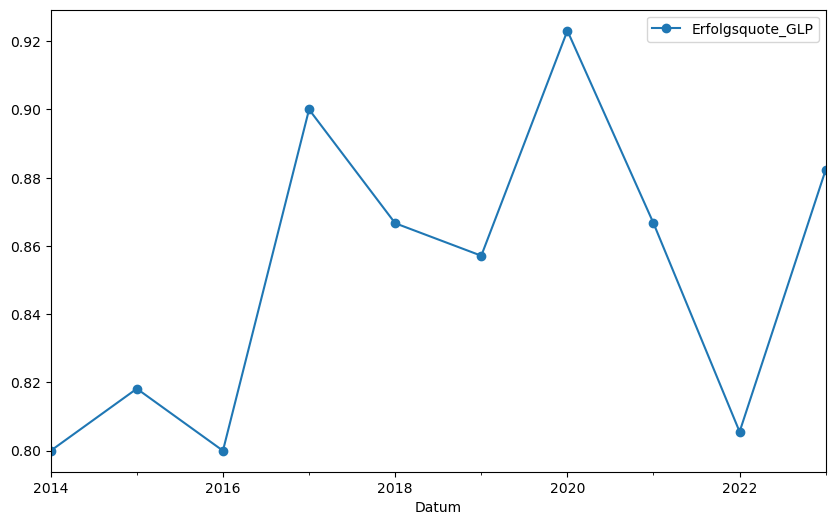

In [43]:
df_erfolgsquote_glp_jahr.plot(x= "Datum", y='Erfolgsquote_GLP', marker='o', figsize=(10, 6))

## Zusammenfügen der vier DataFrames

In [44]:
# DataFrames mergen
df_erfolgsquote_alle = df_erfolgsquote_glp_jahr.merge(df_erfolgsquote_fdp_jahr, on='Datum', how='outer') \
    .merge(df_erfolgsquote_sp_jahr, on='Datum', how='outer') \
    .merge(df_erfolgsquote_svp_jahr, on='Datum', how='outer')

df_erfolgsquote_alle

,Datum,Erfolgsquote_GLP,Erfolgsquote_FDP,Erfolgsquote_SP,Erfolgsquote_SVP
0,2014-12-31,0.800000,0.625000,0.840000,0.600000
1,2015-12-31,0.818182,0.777778,0.800000,0.187500
2,2016-12-31,0.800000,0.647059,0.868421,0.363636
3,2017-12-31,0.900000,0.611111,0.966667,0.258065
4,2018-12-31,0.866667,0.774194,0.978723,0.583333
5,2019-12-31,0.857143,0.750000,0.927273,0.437500
6,2020-12-31,0.923077,0.729730,0.935484,0.435897
7,2021-12-31,0.866667,0.735294,0.914286,0.379310
8,2022-12-31,0.805556,0.760870,0.978022,0.400000
9,2023-12-31,0.882353,0.500000,0.961538,0.275862


<Axes: xlabel='Datum'>

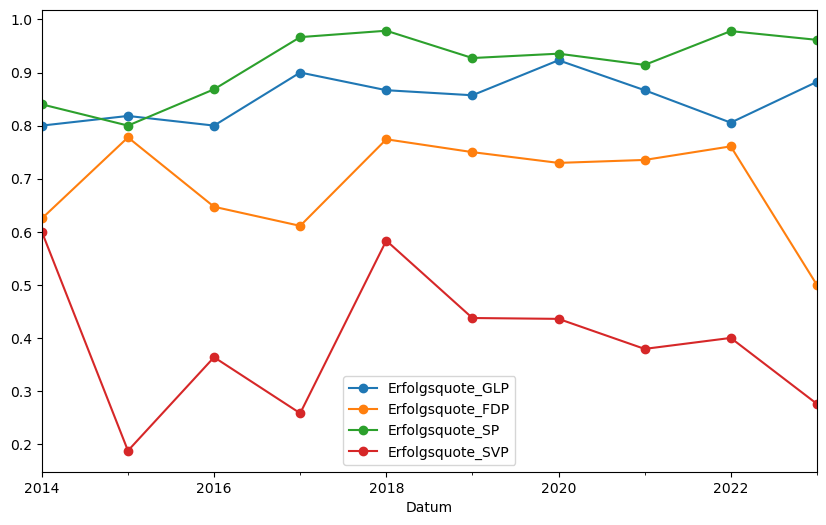

In [45]:
df_erfolgsquote_alle.plot(x= "Datum", marker='o', figsize=(10, 6))

In [46]:
#Diese Resultate speichern
df_erfolgsquote_alle.to_csv('Erfolgsquote_Parteien_jährlich.csv', index=False)

2       True
7       True
10     False
13     False
16      True
       ...  
479     True
482    False
484     True
490    False
492     True
Name: _entscheidbereinigt, Length: 254, dtype: bool